## **Proyek Analisis Data E-Commerrce**

### **Menentukan Tujuan Bisnis**


*   Menghitung nilai order pada tiap kota yang terbesar bedasarkan order status
*   Mencari jumlah pengiriman pemesanan yang terbesar di tiap kota berdasarkan pemesanan
*   Mencari persentase pembatalan pemesanan terbesar dari customer tiap kota



### **Penyiapan Library**






In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Data Wrangling**
#### **Gathering Data**
Mengumpulkan data dan menggabungkan data

In [2]:
customer = pd.read_csv("/content/drive/MyDrive/Proyek Analisis Data (Dicoding)/E-Commerce Public Dataset/customers_dataset.csv")
print(customer.shape)
customer.head()

(99441, 5)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
order_items = pd.read_csv("/content/drive/MyDrive/Proyek Analisis Data (Dicoding)/E-Commerce Public Dataset/order_items_dataset.csv")
print(order_items.shape)
order_items.head()

(112650, 7)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [4]:
order_payments = pd.read_csv("/content/drive/MyDrive/Proyek Analisis Data (Dicoding)/E-Commerce Public Dataset/order_payments_dataset.csv")
print(order_payments.shape)
order_payments.head()

(103886, 5)


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [5]:
order_reviews = pd.read_csv("/content/drive/MyDrive/Proyek Analisis Data (Dicoding)/E-Commerce Public Dataset/order_reviews_dataset.csv")
print(order_reviews.shape)
order_reviews.head()

(99224, 7)


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [6]:
orders = pd.read_csv("/content/drive/MyDrive/Proyek Analisis Data (Dicoding)/E-Commerce Public Dataset/orders_dataset.csv")
print(orders.shape)
orders.head()

(99441, 8)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [7]:
product_category = pd.read_csv("/content/drive/MyDrive/Proyek Analisis Data (Dicoding)/E-Commerce Public Dataset/product_category_name_translation.csv")
print(product_category.shape)
product_category.head()

(71, 2)


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [8]:
product_dataset = pd.read_csv("/content/drive/MyDrive/Proyek Analisis Data (Dicoding)/E-Commerce Public Dataset/products_dataset.csv")
print(product_dataset.shape)
product_dataset.head()

(32951, 9)


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [9]:
seller = pd.read_csv("/content/drive/MyDrive/Proyek Analisis Data (Dicoding)/E-Commerce Public Dataset/sellers_dataset.csv")
print(seller.shape)
seller.head()

(3095, 4)


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### **Penggabungan Data**

In [10]:
#Menggabungkan tabel customer dengan tabel orders
customer_orders = pd.merge(
    left=customer,
    right=orders,
    how="inner",
    left_on="customer_id",
    right_on="customer_id"
)
customer_orders.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00


In [11]:
customer_orders.nunique()

customer_id                      99441
customer_unique_id               96096
customer_zip_code_prefix         14994
customer_city                     4119
customer_state                      27
order_id                         99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
dtype: int64

In [12]:
customer_orders[['customer_state', 'order_status']].nunique()

customer_state    27
order_status       8
dtype: int64

### **Assessing Data**

#### Menilai tabel customer_orders

In [13]:
"""
terdapat missing value pada kolom order_approved_at, order_delivered_carrier_date,
order_delivered_customer_date. terdapat juga kesalahan tipe data pada order_purchase_timestamp,
order_approved_at, order_delivered_carrier_date, order_delivered_customer_date dan order_estimated_delivared_date
"""
customer_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   customer_id                    99441 non-null  object
 1   customer_unique_id             99441 non-null  object
 2   customer_zip_code_prefix       99441 non-null  int64 
 3   customer_city                  99441 non-null  object
 4   customer_state                 99441 non-null  object
 5   order_id                       99441 non-null  object
 6   order_status                   99441 non-null  object
 7   order_purchase_timestamp       99441 non-null  object
 8   order_approved_at              99281 non-null  object
 9   order_delivered_carrier_date   97658 non-null  object
 10  order_delivered_customer_date  96476 non-null  object
 11  order_estimated_delivery_date  99441 non-null  object
dtypes: int64(1), object(11)
memory usage: 9.9+ MB


In [14]:
"""
terdapat 160 missing value pada kolom order_approved_at, 1783 missing value pada kolom order_delivered_carrier_date,
dan 2965 missing value pada kolom order_delivered_customer_date
"""
print(customer_orders.shape)
customer_orders.isnull().sum()

(99441, 12)


customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [15]:
print("Jumlah duplikasi: ", customer_orders.duplicated().sum())

Jumlah duplikasi:  0


In [16]:
customer_orders.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


### **Cleansing Data**

#### Menangani missing value pada tabel customer_orders

In [17]:
customer_orders.isna().sum()

customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [18]:
customer_orders[customer_orders.order_approved_at.isna()]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1072,1d07a80a15700b40cb15ff5870ee8b48,0e9bafe047d5c6fe3fd8ef6bcdce9a1a,62030,sobral,CE,85e05c3c9aa9834518f35d4f286014be,canceled,2018-08-28 08:18:22,NaN,NaN,NaN,2018-10-10 00:00:00
1087,ad2eb5d02c0808bcd8743117f6383cf6,ef0103e9602d12594d19c2b666219bc1,30810,belo horizonte,MG,bd35b677fd239386e9861d11ae98ab56,canceled,2018-09-17 17:21:16,NaN,NaN,NaN,2018-10-01 00:00:00
1657,82d98198f7fb1687858e03a5322e1621,b351ac91ab0ef29bae6da7fbc05959c0,80420,curitiba,PR,38a86eb53c2309d6234fc9bad96331ac,canceled,2018-08-18 12:39:31,NaN,NaN,NaN,2018-08-29 00:00:00
3198,b1253701171dfb298f52a221f824e45b,788313d21c3507fe890921f6e17aa679,11070,santos,SP,afed0d88ec7753e7be8744bb66e860d1,canceled,2018-08-02 15:23:07,NaN,NaN,NaN,2018-08-20 00:00:00
3742,a73c1f73f5772cf801434bf984b0b1a7,968fac81e2c44fb6c1e3ac2a45e6a102,4685,sao paulo,SP,4637ca194b6387e2d538dc89b124b0ee,canceled,2018-09-03 14:14:25,NaN,NaN,NaN,2018-09-10 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
94700,f76bd438480c183ffb510bad040f3bd9,9f53b6d0ec91131fac2c1724f511f3ce,96600,cangucu,RS,670e3b20191d3198a76069c8f9b12355,canceled,2017-02-03 00:55:24,NaN,NaN,NaN,2017-03-09 00:00:00
95462,8e9e28f565a0e470a97fd879909388fe,d9456ef6d4231fb2637e490212b3e32f,18055,sorocaba,SP,596288a27579ad1fec1d704efe7d9ab7,canceled,2017-08-30 18:48:01,NaN,NaN,NaN,2017-09-12 00:00:00
95528,719ed1620e6d57e729521a5408f6e9dd,d35b852498996bd67a141c266e92f35b,1042,sao paulo,SP,66e4a36ff490014773971a6ee0b6a0e4,canceled,2017-06-20 12:39:25,NaN,NaN,NaN,2017-07-05 00:00:00
97375,43c2e0c2bffdba58e569a9cf02d9b508,85a682703424ab2ab05bfb24b2a582cd,45460,wenceslau guimaraes,BA,252788350f9dad30b31847845fe119fe,canceled,2017-04-23 14:58:37,NaN,NaN,NaN,2017-05-23 00:00:00


##### Mengabaikan missing value pada data customer_orders

#### Memperbaiki tipe data

In [19]:
customer_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   customer_id                    99441 non-null  object
 1   customer_unique_id             99441 non-null  object
 2   customer_zip_code_prefix       99441 non-null  int64 
 3   customer_city                  99441 non-null  object
 4   customer_state                 99441 non-null  object
 5   order_id                       99441 non-null  object
 6   order_status                   99441 non-null  object
 7   order_purchase_timestamp       99441 non-null  object
 8   order_approved_at              99281 non-null  object
 9   order_delivered_carrier_date   97658 non-null  object
 10  order_delivered_customer_date  96476 non-null  object
 11  order_estimated_delivery_date  99441 non-null  object
dtypes: int64(1), object(11)
memory usage: 9.9+ MB


In [20]:
datetime_columns = ["order_approved_at","order_delivered_carrier_date","order_delivered_customer_date","order_estimated_delivery_date", "order_purchase_timestamp" ]

for column in datetime_columns:
  customer_orders[column] = pd.to_datetime(customer_orders[column])

In [21]:
customer_orders['order_status'] = customer_orders['order_status'].astype('category')

In [22]:
customer_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_id                    99441 non-null  object        
 1   customer_unique_id             99441 non-null  object        
 2   customer_zip_code_prefix       99441 non-null  int64         
 3   customer_city                  99441 non-null  object        
 4   customer_state                 99441 non-null  object        
 5   order_id                       99441 non-null  object        
 6   order_status                   99441 non-null  category      
 7   order_purchase_timestamp       99441 non-null  datetime64[ns]
 8   order_approved_at              99281 non-null  datetime64[ns]
 9   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 10  order_delivered_customer_date  96476 non-null  datetime64[ns]
 11  order_estimated

In [23]:
customer_orders.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15


### **Exploratory Data Analysis (EDA) Dan Visualisasi**

#### Exploratory tabel customer_orders

In [24]:
customer_orders.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
13800,a89d66132d3056ff2ab8790816f200ca,24a4bae470bbd58be0bbbaec35d01021,13420,piracicaba,SP,c90f87f78dfac2717cdb50f16fdd734a,delivered,2018-04-24 22:39:11,2018-04-24 22:50:14,2018-04-25 12:54:00,2018-04-30 14:15:30,2018-05-17
95366,a584daec24287b6e6760e3784d490d36,37ef9a394acb71843b127f61a5809022,26650,engenheiro paulo de frontin,RJ,42889cba53a791dfa45f24d62019a521,delivered,2017-11-27 19:19:43,2017-11-29 19:17:05,2017-12-01 13:31:52,2017-12-27 17:34:26,2017-12-20
81802,5587073a673239e340006c2ee9e215d2,12215827d4b7044ebecfc04e04ab06f0,88058,florianopolis,SC,2aa83d9dae401c1373417afddd15fc5c,delivered,2017-06-20 09:55:57,2017-06-23 09:50:13,2017-06-26 18:47:57,2017-07-05 14:43:53,2017-07-12
18283,ea2faf6b4dcc7a2196f1c647cddd7714,fb6b1aa35eda4a0793d8802986cac52a,29300,cachoeiro de itapemirim,ES,a35cd49972d7afbd0822f2da96d94d62,delivered,2018-03-19 02:21:39,2018-03-19 04:35:27,2018-03-19 18:36:46,2018-03-26 17:13:56,2018-04-06
55968,5247e5c7e9037e74343f13bbd8800a6a,001147e649a7b1afd577e873841632dd,87020,maringa,PR,533dbcda0a703be171113573af8b3467,delivered,2017-08-31 17:12:56,2017-08-31 17:25:15,2017-09-01 19:09:12,2017-09-08 19:54:28,2017-09-22


In [25]:
customer_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_id                    99441 non-null  object        
 1   customer_unique_id             99441 non-null  object        
 2   customer_zip_code_prefix       99441 non-null  int64         
 3   customer_city                  99441 non-null  object        
 4   customer_state                 99441 non-null  object        
 5   order_id                       99441 non-null  object        
 6   order_status                   99441 non-null  category      
 7   order_purchase_timestamp       99441 non-null  datetime64[ns]
 8   order_approved_at              99281 non-null  datetime64[ns]
 9   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 10  order_delivered_customer_date  96476 non-null  datetime64[ns]
 11  order_estimated

In [26]:
customer_orders.describe(include="all")

<ipython-input-26-e0392354e17d>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  customer_orders.describe(include="all")
<ipython-input-26-e0392354e17d>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  customer_orders.describe(include="all")
<ipython-input-26-e0392354e17d>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  customer_orders.describe(include="all")
<ipython-input-26-e0392354e1

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441.000000,99441,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,96096,NaN,4119,27,99441,8,98875,90733,81018,95664,459
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2018-08-02 12:06:09,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-02-14 21:09:19,2017-12-20 00:00:00
freq,1,17,NaN,15540,41746,1,96478,3,9,47,3,522
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00
mean,NaN,NaN,35137.474583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### **Menghitung nilai order status yang terbesar**

In [27]:
sum_order_city = customer_orders.groupby("order_status").customer_city.count().sort_values(ascending=False).reset_index(name='count_city_order')
sum_order_city.head(8)

,order_status,count_city_order
0,delivered,96478
1,shipped,1107
2,canceled,625
3,unavailable,609
4,invoiced,314
5,processing,301
6,created,5
7,approved,2


In [28]:
from google.colab import files
sum_order_city.to_csv('order_terbesar.csv', encoding = 'utf-8-sig')
files.download('order_terbesar.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

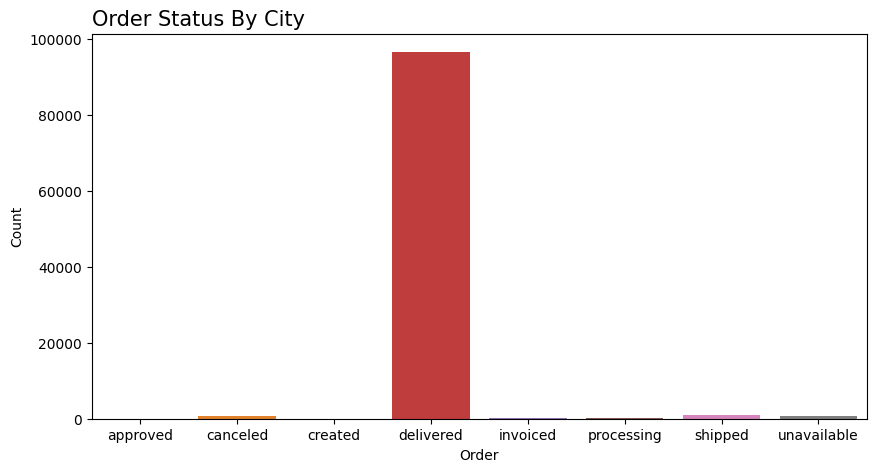

In [29]:
plt.figure(figsize=(10, 5))

sns.barplot(
    x="order_status",
    y="count_city_order",
    data=sum_order_city
)
plt.title("Order Status By City", loc="left", fontsize=15)
plt.ylabel("Count")
plt.xlabel("Order")
plt.tick_params(axis='x', labelsize=10)
plt.show()

##### Nilai order yang terbesar yaitu order status delivered sebesar 96487, sedangkan order status terkecil yaitu approved sebanyak 2

#### **Mencari jumlah pengiriman pemesanan yang terbesar di tiap kota berdasarkan status pemesanan**

In [30]:
customer_orders['order_status'].unique()

['delivered', 'canceled', 'invoiced', 'shipped', 'processing', 'unavailable', 'approved', 'created']
Categories (8, object): ['approved', 'canceled', 'created', 'delivered', 'invoiced', 'processing',
                         'shipped', 'unavailable']

In [31]:
city_orders_delivered = customer_orders.loc[customer_orders['order_status']=='delivered',['customer_city']].value_counts().sort_values(ascending=False).reset_index(name='count_delivered')
city_orders_delivered_tophead = city_orders_delivered.head(10)
city_orders_delivered_tophead

,customer_city,count_delivered
0,sao paulo,15045
1,rio de janeiro,6601
2,belo horizonte,2697
3,brasilia,2071
4,curitiba,1489
5,campinas,1406
6,porto alegre,1342
7,salvador,1188
8,guarulhos,1144
9,sao bernardo do campo,911


In [47]:
city_orders_delivered.tail()

,customer_city,count_delivered
4080,angical do piaui,1
4081,berizal,1
4082,bertolinia,1
4083,uirauna,1
4084,retirolandia,1


In [56]:
city_orders_delivered[city_orders_delivered['count_delivered'] == 1].count()

customer_city      1138
count_delivered    1138
dtype: int64

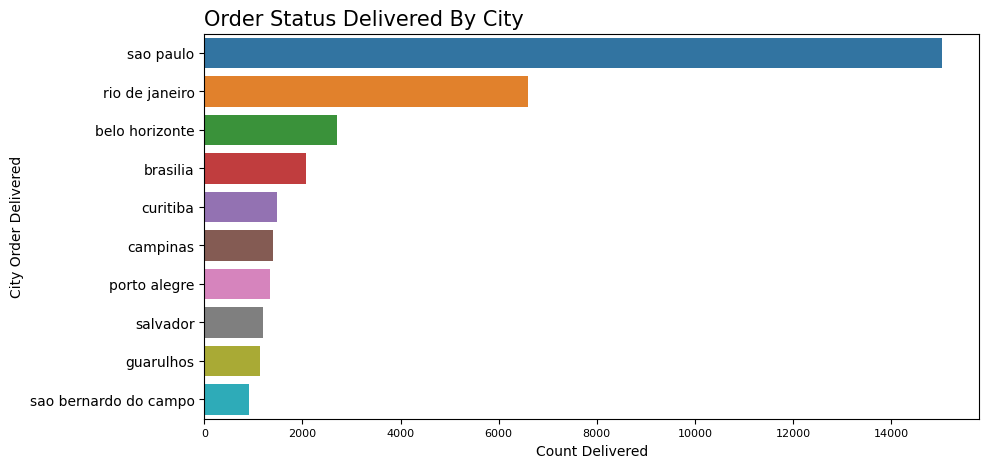

In [32]:
plt.figure(figsize=(10, 5))

sns.barplot(
    x="count_delivered",
    y="customer_city",
    data=city_orders_delivered.iloc[:10]
)
plt.title("Order Status Delivered By City", loc="left", fontsize=15)
plt.ylabel("City Order Delivered")
plt.xlabel("Count Delivered")
plt.tick_params(axis='x', labelsize=8)
plt.show()

##### Dapat disimpulkan bahwa 5 kota dengan order status delivered terbesar adalah sao paulo, rio de janeiro, belo horizonter, brasilia dan curitiba

In [33]:
from google.colab import files
city_orders_delivered_tophead.to_csv('order_delivered.csv', encoding = 'utf-8-sig')
files.download('order_delivered.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### **Mencari persentase pembatalan pemesanan terbesar dari customer tiap kota**

In [34]:
city_orders_canceled = customer_orders.loc[customer_orders['order_status']=='canceled',['customer_city']].value_counts().sort_values(ascending=False).reset_index(name='count_canceled')
city_orders_canceled.head(10)

,customer_city,count_canceled
0,sao paulo,140
1,rio de janeiro,48
2,belo horizonte,17
3,guarulhos,13
4,campinas,11
5,curitiba,10
6,sao bernardo do campo,8
7,osasco,8
8,brasilia,7
9,goiania,7


In [48]:
city_orders_canceled.tail()

,customer_city,count_canceled,percent_orders_canceled
242,tatui,1,0.16
243,sobral,1,0.16
244,sinop,1,0.16
245,sapiranga,1,0.16
246,wenceslau guimaraes,1,0.16


In [53]:
city_orders_canceled[city_orders_canceled['count_canceled'] == 1].count()

customer_city              171
count_canceled             171
percent_orders_canceled    171
dtype: int64

In [35]:
city_orders_canceled['count_canceled'].sum()

625

In [36]:
city_orders_canceled['percent_orders_canceled'] = ((city_orders_canceled['count_canceled'] / city_orders_canceled['count_canceled'].sum()) * 100).round(2)
city_orders_canceled_top10 = city_orders_canceled.head(10)
city_orders_canceled_top10

,customer_city,count_canceled,percent_orders_canceled
0,sao paulo,140,22.40
1,rio de janeiro,48,7.68
2,belo horizonte,17,2.72
3,guarulhos,13,2.08
4,campinas,11,1.76
5,curitiba,10,1.60
6,sao bernardo do campo,8,1.28
7,osasco,8,1.28
8,brasilia,7,1.12
9,goiania,7,1.12


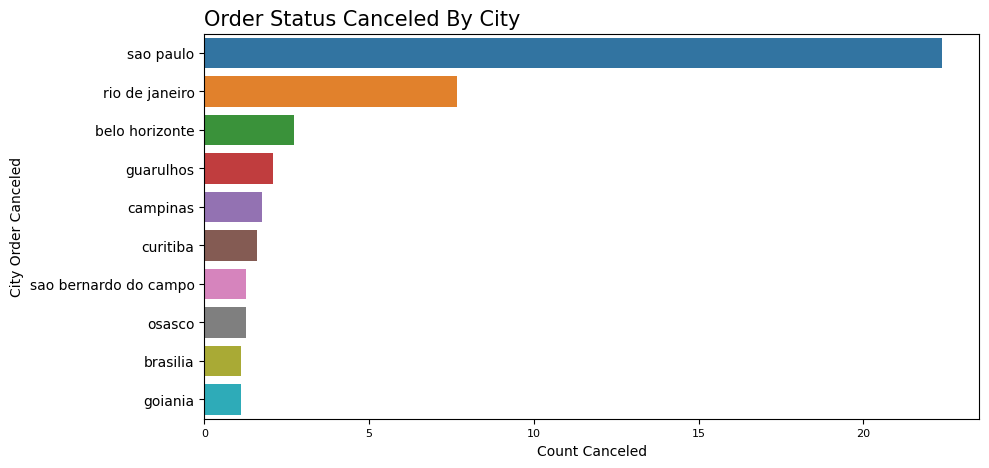

In [37]:
plt.figure(figsize=(10, 5))

sns.barplot(
    x="percent_orders_canceled",
    y="customer_city",
    data=city_orders_canceled_top10
)
plt.title("Order Status Canceled By City", loc="left", fontsize=15)
plt.ylabel("City Order Canceled")
plt.xlabel("Count Canceled")
plt.tick_params(axis='x', labelsize=8)
plt.show()

##### Dapat disimpulkan bahwa 5 kota dengan order status canceled terbesar yaitu sao paulo sebesar 22,40%, rio de janeiro sebesar 7,68%, belo horizonte sebesar 2,72%, guarulhos sebesar 2,08% dan campinas sebesar 1,60%

In [38]:
from google.colab import files
city_orders_canceled_top10.to_csv('order_canceled.csv', encoding = 'utf-8-sig')
files.download('order_canceled.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **Conclusion**

#### **1. Status pemesanan yang paling terbanyak terjadi pada saat customer melakukan pembelian product**

###### Status pemesanan yang paling banyak terjadi adalah delivered sebesar 96478 sedangkan banyak customer yang melakukan cancel pemesanan sebesar 625 dan yang status pemesanan dengan nilai terkecil adalah aprroved sebesar 2

#### **2. Jumlah status pemesanan pengiriman yang terbesar terdapat pada kota? dan jumlah status pemesanan pengiriman terkecil terdapat pada kota?**

###### Kota sao paolo menduduku pringkat pertama dengan nilai frekuensi jumlah status pemesanan pada tahapan pengiriman yang terbesar yaitu 15045 sedangkan terdapat 1138 kota yang hanya melakukan status pemesanan pada tahapan pengiriman dengan nilai frekeunsi pengiriman hanya sebesar 1

#### **3. Persentase status pemesanan pembatalan yang terbesar terdapat pada kota? dan jumlah status pemesanan pembatalan terkecil terdapat pada kota?**

###### Kota sao paolo menduduki pringkat pertama dengan nilai persentase status pemesanan pada tahapan pembatalan yang terbesar dengan nilai persentase frekuensi pembatalan sebesar 22,40% sedangkan terdapat 171 kota yang hanya melakukan status pemesanan pada tahapan pembatalan dengan nilai frekuensi pembatalan sebesar 0,16%